# Download Dataset

In [1]:
!wget "https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/4drtyfjtfy-1.zip"

--2022-12-10 10:00:38--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/4drtyfjtfy-1.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 52.92.34.26, 52.218.116.2, 52.218.88.136, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|52.92.34.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95592747 (91M) [application/octet-stream]
Saving to: ‘4drtyfjtfy-1.zip’

4drtyfjtfy-1.zip    100%[===================>]  91.16M  25.8MB/s    in 3.9s    

2022-12-10 10:00:42 (23.3 MB/s) - ‘4drtyfjtfy-1.zip’ saved [95592747/95592747]



In [24]:
!unzip 4drtyfjtfy-1.zip

Archive:  4drtyfjtfy-1.zip
  inflating: dataset2.zip            


In [25]:
!unzip dataset2.zip

Archive:  dataset2.zip
   creating: dataset2/
  inflating: dataset2/cloudy1.jpg    
  inflating: dataset2/cloudy10.jpg   
  inflating: dataset2/cloudy100.jpg  
  inflating: dataset2/cloudy101.jpg  
  inflating: dataset2/cloudy102.jpg  
  inflating: dataset2/cloudy103.jpg  
  inflating: dataset2/cloudy104.jpg  
  inflating: dataset2/cloudy105.jpg  
  inflating: dataset2/cloudy106.jpg  
  inflating: dataset2/cloudy107.jpg  
  inflating: dataset2/cloudy108.jpg  
  inflating: dataset2/cloudy109.jpg  
  inflating: dataset2/cloudy11.jpg   
  inflating: dataset2/cloudy110.jpg  
  inflating: dataset2/cloudy111.jpg  
  inflating: dataset2/cloudy112.jpg  
  inflating: dataset2/cloudy113.jpg  
  inflating: dataset2/cloudy114.jpg  
  inflating: dataset2/cloudy115.jpg  
  inflating: dataset2/cloudy116.jpg  
  inflating: dataset2/cloudy117.jpg  
  inflating: dataset2/cloudy118.jpg  
  inflating: dataset2/cloudy119.jpg  
  inflating: dataset2/cloudy12.jpg   
  inflating: dataset2/cloudy120.jpg  
  in

#Import Libraries

In [4]:
# import libraries

from PIL import Image, ImageDraw, ImageFilter
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, auc
import seaborn as sns
from sklearn.svm import SVC

from sklearn.decomposition import PCA

import matplotlib.gridspec as gridspec
import itertools
from IPython.display import display
from mlxtend.plotting import plot_decision_regions

# PreProccess Data

In [26]:
thumb_width = 32

In [27]:
!mkdir out

## Resize Images and make numerical label

In [28]:
X = np.empty((1,thumb_width**2+1))
for filename in glob.glob('/content/dataset2/*.jpg'):
    im = Image.open(filename)
    im_thumb = im.resize((32,32), Image.LANCZOS).convert('L')
    x = np.asarray(im_thumb).reshape(1,thumb_width**2)
    y = -1
    if filename.find('cloudy') != -1:
        y = 0
    elif filename.find('rain') != -1:
        y = 1
    elif filename.find('shine') != -1:
        y = 2
    elif filename.find('sunrise') != -1:
        y = 3
    else:
        print('err')
        pass

    im_thumb.save('/content/out/{}'.format(filename.split('/')[-1]), quality=100)
    x = np.append(x,[y]).reshape(1,thumb_width**2+1)
    X = np.append(X,x, axis=0)
X = X[1:,:]

In [29]:
!zip -r out.zip out

updating: out/ (stored 0%)
  adding: out/shine229.jpg (deflated 1%)
  adding: out/sunrise282.jpg (deflated 3%)
  adding: out/cloudy53.jpg (deflated 1%)
  adding: out/sunrise257.jpg (deflated 2%)
  adding: out/shine246.jpg (deflated 1%)
  adding: out/sunrise341.jpg (deflated 3%)
  adding: out/cloudy248.jpg (deflated 1%)
  adding: out/shine203.jpg (deflated 2%)
  adding: out/sunrise175.jpg (deflated 2%)
  adding: out/cloudy129.jpg (deflated 1%)
  adding: out/shine131.jpg (deflated 1%)
  adding: out/sunrise320.jpg (deflated 4%)
  adding: out/cloudy136.jpg (deflated 2%)
  adding: out/shine72.jpg (deflated 2%)
  adding: out/sunrise328.jpg (deflated 3%)
  adding: out/cloudy114.jpg (deflated 2%)
  adding: out/sunrise37.jpg (deflated 2%)
  adding: out/shine104.jpg (deflated 2%)
  adding: out/sunrise105.jpg (deflated 1%)
  adding: out/cloudy243.jpg (deflated 4%)
  adding: out/shine63.jpg (deflated 2%)
  adding: out/sunrise293.jpg (deflated 2%)
  adding: out/rain194.jpg (deflated 1%)
  adding: o

In [30]:
!rm -rf out

## Save as CSV file

In [31]:
# convert array into dataframe
DF = pd.DataFrame(X)
# save the dataframe as a csv file
DF.to_csv("weather.csv")

In [32]:
!cp /content/weather.csv /content/drive/MyDrive/ML

cp: cannot create regular file '/content/drive/MyDrive/ML': No such file or directory


In [33]:
data = pd.read_csv("/content/weather.csv")
data.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,25.0,28.0,29.0,31.0,32.0,32.0,33.0,37.0,41.0,...,123.0,136.0,190.0,175.0,112.0,119.0,122.0,142.0,140.0,2.0
1,1,90.0,91.0,95.0,96.0,99.0,99.0,99.0,104.0,107.0,...,58.0,55.0,65.0,72.0,67.0,70.0,69.0,65.0,58.0,3.0
2,2,9.0,25.0,40.0,44.0,48.0,74.0,71.0,75.0,95.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,30.0,52.0,59.0,66.0,73.0,77.0,95.0,94.0,89.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,4.0,3.0
4,4,133.0,158.0,213.0,115.0,56.0,71.0,73.0,77.0,78.0,...,93.0,100.0,98.0,89.0,86.0,72.0,61.0,51.0,46.0,2.0


## Split train, validation and test

In [34]:
# split data & label
X_train = data.iloc[:, 1:-1].values.astype(np.float32)
Y_train = data.iloc[:, -1].values.astype(np.float32)


X_train = X_train/255

#define Label number to real Label
data_classes = ['Cloudy', 'rain', 'shine', 'sunrise']

# make Train & validation set
train_set, test_set, train_labels, test_labels = train_test_split(X_train, Y_train, stratify=Y_train,
                                                                      random_state= 231,test_size=0.20)

In [35]:
unique, counts = np.unique(Y_train, return_counts=True)
for i,x in enumerate(data_classes):
    print('{} counts: {}'.format(x,counts[i]))

Cloudy counts: 300
rain counts: 213
shine counts: 253
sunrise counts: 356


In [38]:
print(train_set.shape,test_set.shape)
print(train_labels.shape,test_labels.shape)

(897, 1024) (225, 1024)
(897,) (225,)


In [39]:
sample_image = train_set[1].reshape(32,32)

In [40]:
sample_image.shape

(32, 32)

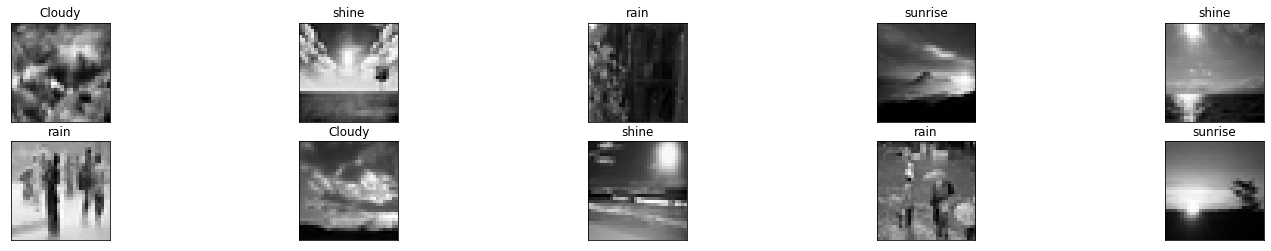

In [41]:
fig=plt.figure(figsize=(25,4))
for i in range(1,11):
    ax=fig.add_subplot(2,5,i,xticks=[],yticks=[])
    ax.imshow(train_set[i].reshape(32,32),cmap='gray')
    ax.set_title(data_classes[round(train_labels[i])])

# Metric Functions

In [42]:
# Make the confusion matrix
def confusion_plot(y_test,y_pred,title):
    cmt = confusion_matrix(y_test,y_pred)
    plt.rcParams['figure.figsize'] = (10,8)
    sns.heatmap(cmt,fmt='',annot=True,linewidth=0.01,cmap=sns.cubehelix_palette(as_cmap=True))
    plt.title("confusion matrix {}".format(title))
    plt.xlabel("predicted")
    plt.ylabel("true")
    plt.show()


# generate classification report
def generate_classification_report(y_test,y_pred):
    report=pd.DataFrame.from_dict(classification_report(y_pred,y_test,output_dict=True)).T
    report['Label']=[data_classes[i]  if i<4 else " " for i,x in enumerate(report.index)]
    report=report[['Label','f1-score','precision','recall','support']]
    pd.set_option('display.max_rows', report.shape[0]+1)
    return report

# ROC Curve
def plot_roc_curve(y_test,proba,pos_label):
    fpr, tpr, thresholds = roc_curve(y_test, proba[:,pos_label], pos_label= pos_label)
    roc_auc = roc_auc_score(y_test, proba, multi_class='ovr')

    plt.rcParams['figure.figsize'] = (5,4)
    plt.plot(fpr, tpr,'k:',lw=5, label='average ROC curve (area = {0:0.2f})'.format(roc_auc))
    plt.plot([0 ,1],[0 ,1],'r')
    plt.legend(loc="lower right")
    plt.title('ROC Curve for calss {0}'.format(data_classes[pos_label]))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


# ROC Curve for all classes
def plot_roc_curve_all(y_test,proba,n_class,title):
    for i in range(n_class):
      fpr, tpr, thresholds = roc_curve(y_test, proba[:,i],pos_label= i)
      plt.plot(fpr, tpr,lw=1)
    plt.plot([0 ,1],[0 ,1],'r')
    plt.title('ROC Curve for all classes in {}'.format(title))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(data_classes)
    plt.show()

# SVM with Linear Kernel

In [43]:
gs = gridspec.GridSpec(2, 2)
clf1 = SVC(C = 0.1, kernel = "linear",gamma='scale',probability=True, decision_function_shape='ovr')
clf2 = SVC(C = 1, kernel = "linear",gamma='scale',probability=True, decision_function_shape='ovr')
clf3 = SVC(C = 10, kernel = "linear",gamma='scale',probability=True, decision_function_shape='ovr')
clf4 = SVC(C = 100, kernel = "linear",gamma='scale',probability=True, decision_function_shape='ovr')

linear C = 0.1 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.536585,0.550000,0.523810,63.000000
1.0,rain,0.567568,0.488372,0.677419,31.000000
2.0,shine,0.766355,0.803922,0.732143,56.000000
3.0,sunrise,0.739726,0.760563,0.720000,75.000000
accuracy,,0.662222,0.662222,0.662222,0.662222
macro avg,,0.652559,0.650714,0.663343,225.000000
weighted avg,,0.665755,0.674895,0.662222,225.000000


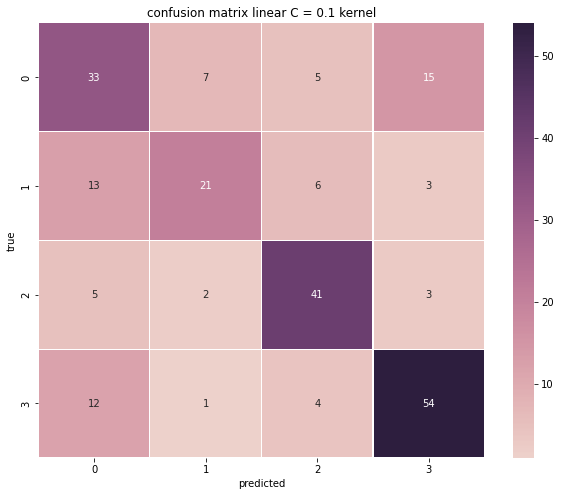

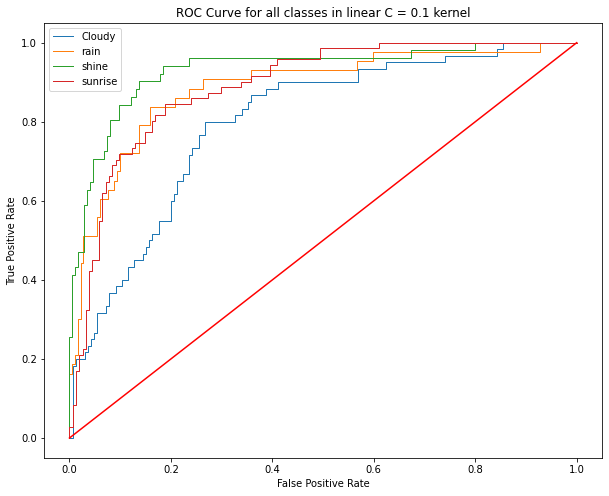

linear C = 1 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.504065,0.516667,0.492063,63.000000
1.0,rain,0.554217,0.534884,0.575000,40.000000
2.0,shine,0.734694,0.705882,0.765957,47.000000
3.0,sunrise,0.712329,0.732394,0.693333,75.000000
accuracy,,0.631111,0.631111,0.631111,0.631111
macro avg,,0.626326,0.622457,0.631589,225.000000
weighted avg,,0.630578,0.631340,0.631111,225.000000


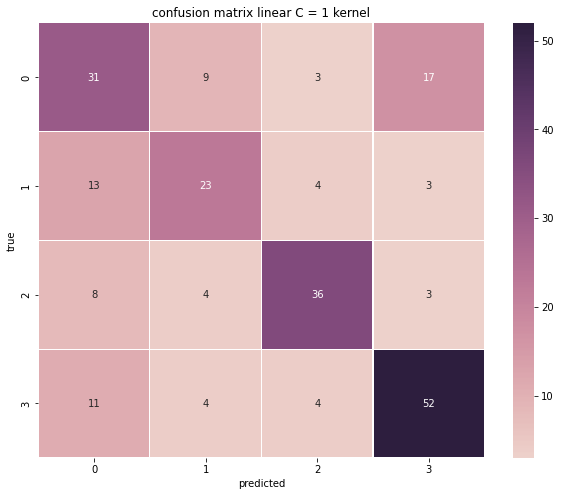

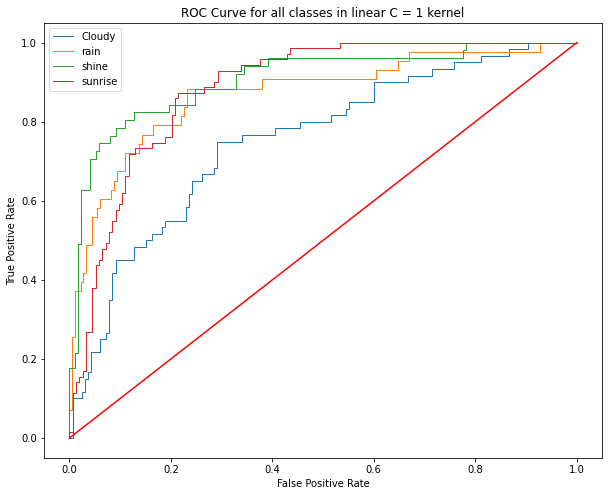

linear C = 10 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.539683,0.566667,0.515152,66.000000
1.0,rain,0.581395,0.581395,0.581395,43.000000
2.0,shine,0.708333,0.666667,0.755556,45.000000
3.0,sunrise,0.704225,0.704225,0.704225,71.000000
accuracy,,0.635556,0.635556,0.635556,0.635556
macro avg,,0.633409,0.629739,0.639082,225.000000
weighted avg,,0.633307,0.632889,0.635556,225.000000


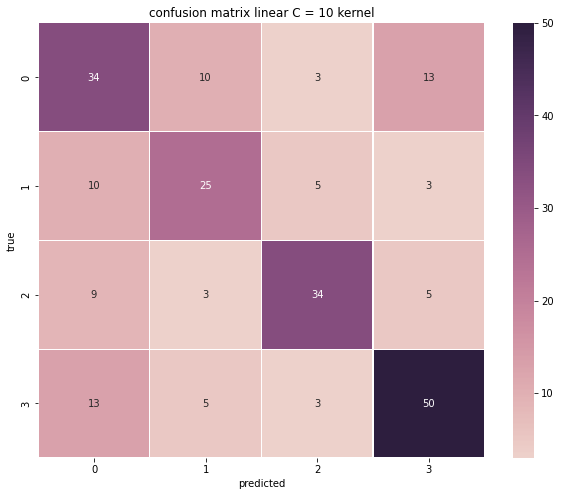

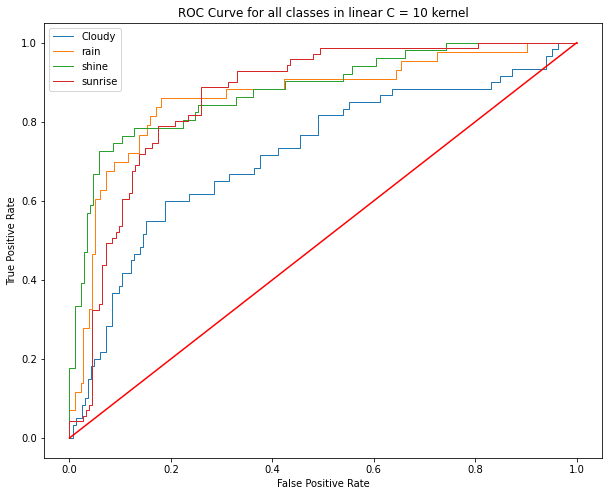

linear C = 100 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.539683,0.566667,0.515152,66.000000
1.0,rain,0.581395,0.581395,0.581395,43.000000
2.0,shine,0.708333,0.666667,0.755556,45.000000
3.0,sunrise,0.704225,0.704225,0.704225,71.000000
accuracy,,0.635556,0.635556,0.635556,0.635556
macro avg,,0.633409,0.629739,0.639082,225.000000
weighted avg,,0.633307,0.632889,0.635556,225.000000


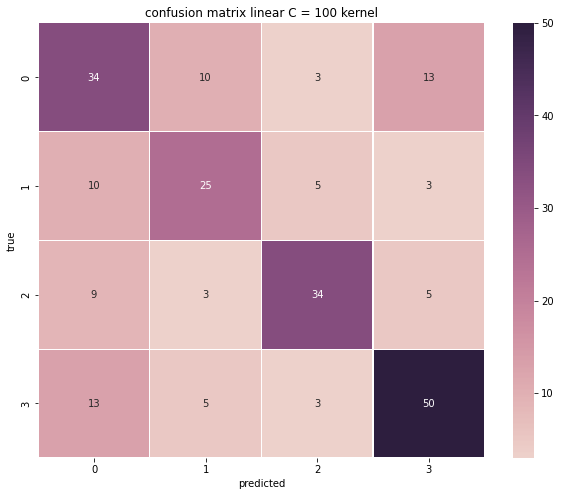

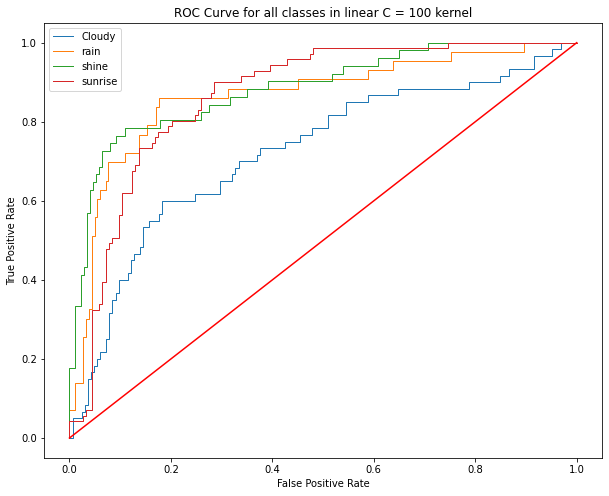

In [44]:

labels = ['linear C = 0.1 kernel', 'linear C = 1 kernel', 'linear C = 10 kernel', 'linear C = 100 kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(train_set, train_labels)
    print(lab)
    y_pred = clf.predict(test_set)
    y_proba = clf.predict_proba(test_set)
    display(generate_classification_report(test_labels, y_pred))
    confusion_plot(test_labels,y_pred,lab)
    plt.show()
    plot_roc_curve_all(test_labels,y_proba,4,lab)


# SVM with rbf Kernel

In [45]:
clf1 = SVC(C = 0.1, kernel = "rbf",gamma='scale',probability=True, decision_function_shape='ovr')
clf2 = SVC(C = 1, kernel = "rbf",gamma='scale',probability=True, decision_function_shape='ovr')
clf3 = SVC(C = 10, kernel = "rbf",gamma='scale',probability=True, decision_function_shape='ovr')
clf4 = SVC(C = 100, kernel = "rbf",gamma='scale',probability=True, decision_function_shape='ovr')

rbf C = 0.1 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.464000,0.483333,0.446154,65.0
1.0,rain,0.406780,0.279070,0.750000,16.0
2.0,shine,0.689655,0.784314,0.615385,65.0
3.0,sunrise,0.720000,0.760563,0.683544,79.0
accuracy,,0.600000,0.600000,0.600000,0.6
macro avg,,0.570109,0.576820,0.623771,225.0
weighted avg,,0.615005,0.653096,0.600000,225.0


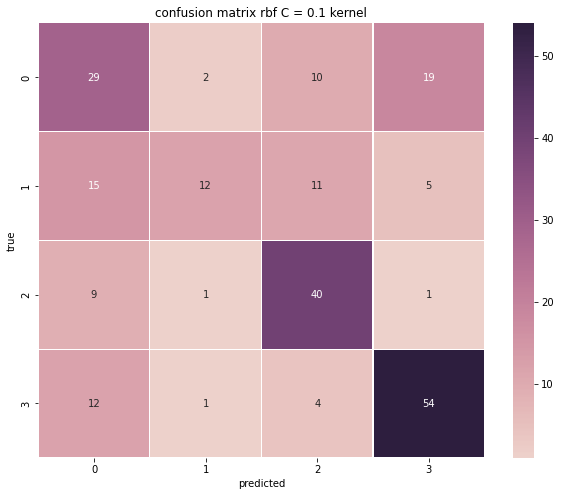

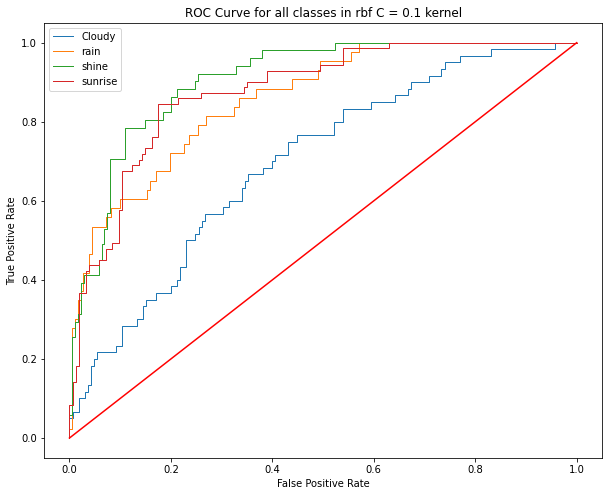

rbf C = 1 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.566372,0.533333,0.603774,53.000000
1.0,rain,0.650602,0.627907,0.675000,40.000000
2.0,shine,0.750000,0.823529,0.688525,61.000000
3.0,sunrise,0.746479,0.746479,0.746479,71.000000
accuracy,,0.684444,0.684444,0.684444,0.684444
macro avg,,0.678363,0.682812,0.678444,225.000000
weighted avg,,0.687964,0.696081,0.684444,225.000000


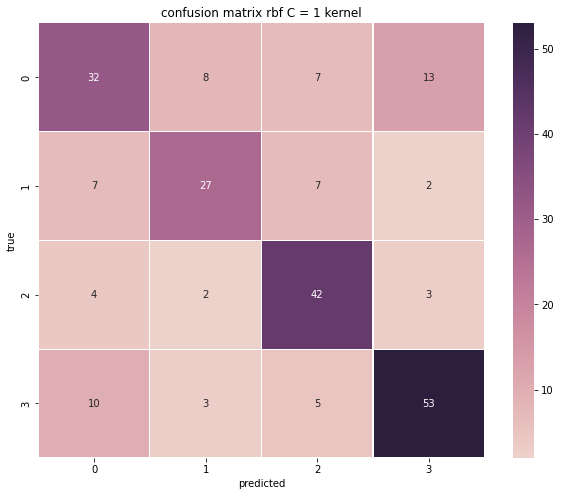

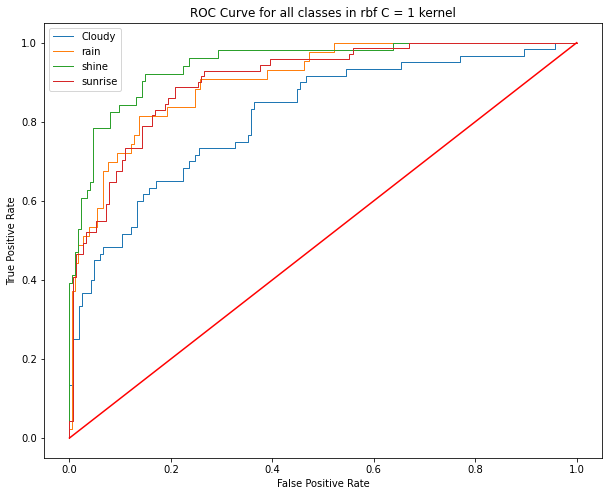

rbf C = 10 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.626087,0.600000,0.654545,55.000000
1.0,rain,0.705882,0.697674,0.714286,42.000000
2.0,shine,0.800000,0.823529,0.777778,54.000000
3.0,sunrise,0.772414,0.788732,0.756757,74.000000
accuracy,,0.728889,0.728889,0.728889,0.728889
macro avg,,0.726096,0.727484,0.725841,225.000000
weighted avg,,0.730846,0.733952,0.728889,225.000000


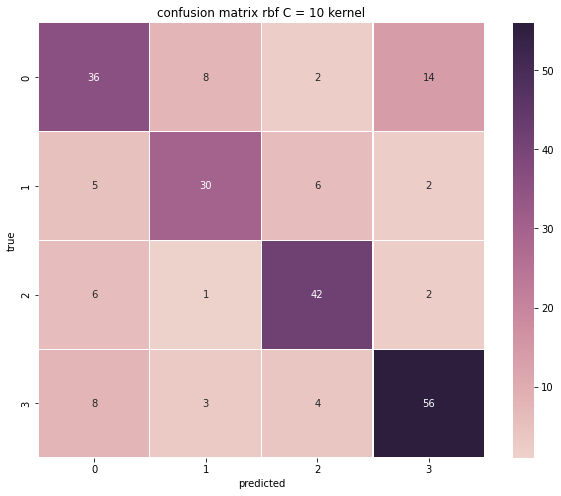

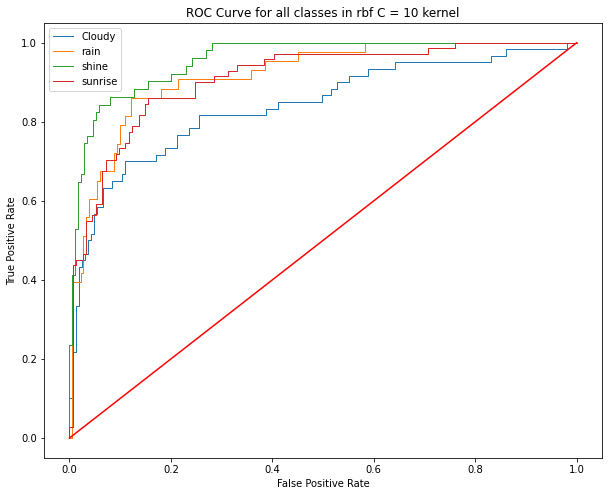

rbf C = 100 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.644628,0.650000,0.639344,61.000000
1.0,rain,0.691358,0.651163,0.736842,38.000000
2.0,shine,0.815534,0.823529,0.807692,52.000000
3.0,sunrise,0.786207,0.802817,0.770270,74.000000
accuracy,,0.737778,0.737778,0.737778,0.737778
macro avg,,0.734432,0.731877,0.738537,225.000000
weighted avg,,0.738582,0.740561,0.737778,225.000000


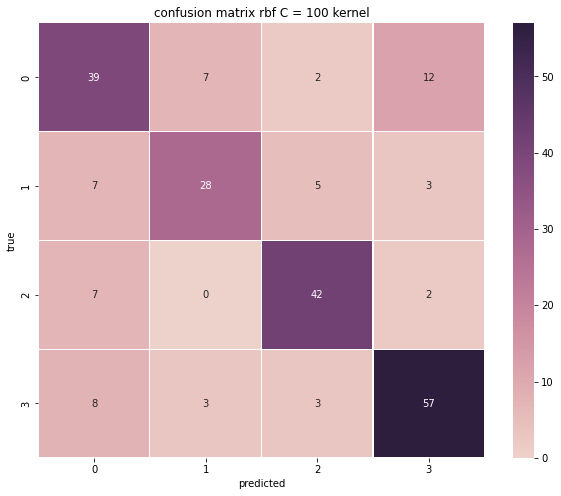

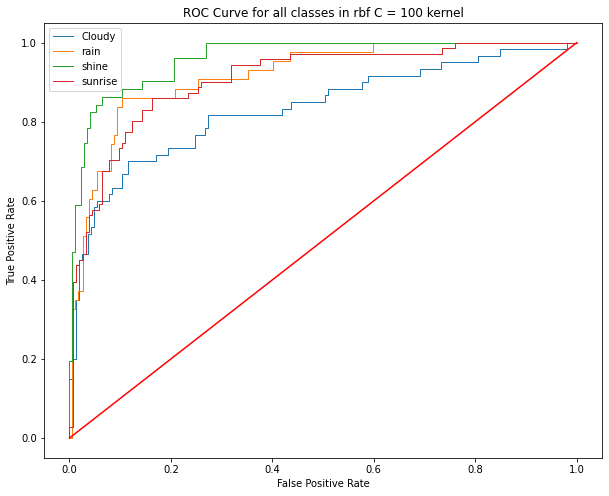

In [46]:

labels = ['rbf C = 0.1 kernel', 'rbf C = 1 kernel', 'rbf C = 10 kernel', 'rbf C = 100 kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(train_set, train_labels)
    print(lab)
    y_pred = clf.predict(test_set)
    y_proba = clf.predict_proba(test_set)
    display(generate_classification_report(test_labels, y_pred))
    confusion_plot(test_labels,y_pred,lab)
    plt.show()
    plot_roc_curve_all(test_labels,y_proba,4,lab)


# SVM with sigmoid Kernel

In [47]:
clf1 = SVC(C = 0.1, kernel = "sigmoid",gamma='scale',probability=True, decision_function_shape='ovr')
clf2 = SVC(C = 1, kernel = "sigmoid",gamma='scale',probability=True, decision_function_shape='ovr')
clf3 = SVC(C = 10, kernel = "sigmoid",gamma='scale',probability=True, decision_function_shape='ovr')
clf4 = SVC(C = 100, kernel = "sigmoid",gamma='scale',probability=True, decision_function_shape='ovr')

sigmoid C = 0.1 kernel


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.076923,0.050000,0.166667,18.000000
1.0,rain,0.000000,0.000000,0.000000,0.000000
2.0,shine,0.000000,0.000000,0.000000,5.000000
3.0,sunrise,0.417582,0.802817,0.282178,202.000000
accuracy,,0.266667,0.266667,0.266667,0.266667
macro avg,,0.123626,0.213204,0.112211,225.000000
weighted avg,,0.381050,0.724751,0.266667,225.000000


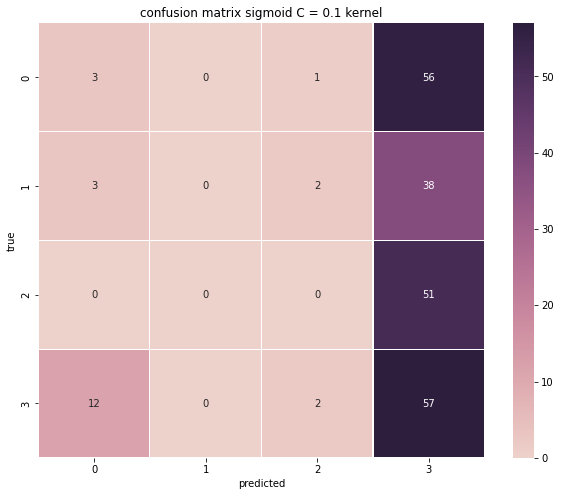

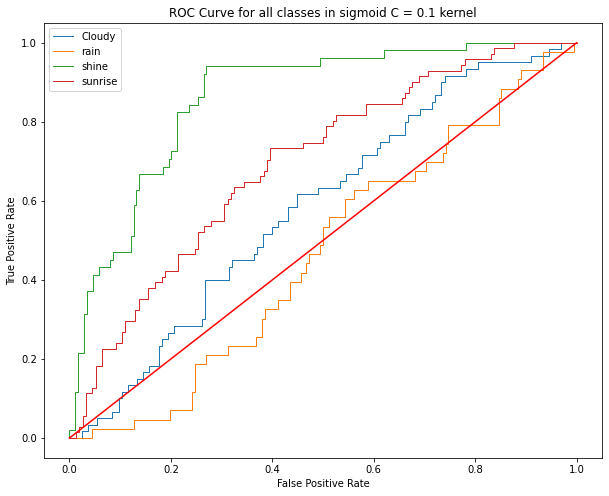

sigmoid C = 1 sigmoid


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.000000,0.000000,0.000000,0.000000
1.0,rain,0.000000,0.000000,0.000000,0.000000
2.0,shine,0.032000,0.039216,0.027027,74.000000
3.0,sunrise,0.324324,0.507042,0.238411,151.000000
accuracy,,0.168889,0.168889,0.168889,0.168889
macro avg,,0.089081,0.136564,0.066359,225.000000
weighted avg,,0.228182,0.353179,0.168889,225.000000


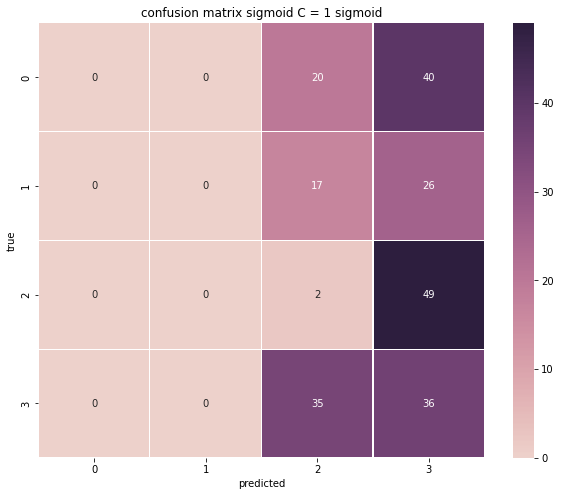

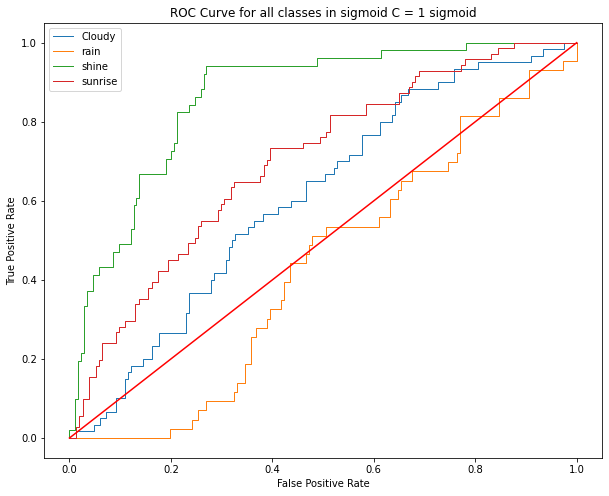

sigmoid C = 10 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.000000,0.000000,0.000000,6.000000
1.0,rain,0.222222,0.372093,0.158416,101.000000
2.0,shine,0.038961,0.058824,0.029126,103.000000
3.0,sunrise,0.209302,0.126761,0.600000,15.000000
accuracy,,0.124444,0.124444,0.124444,0.124444
macro avg,,0.117621,0.139419,0.196886,225.000000
weighted avg,,0.131542,0.202407,0.124444,225.000000


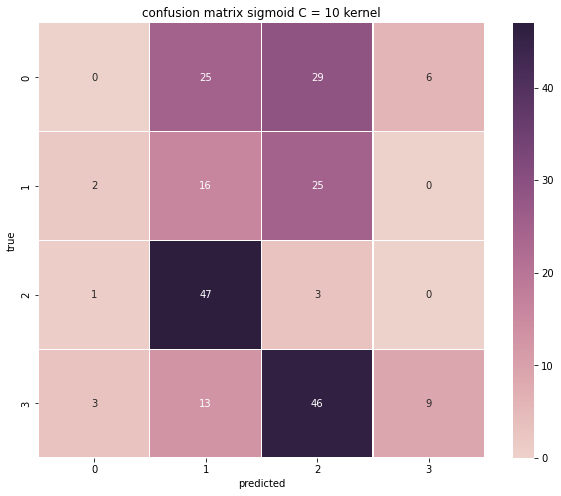

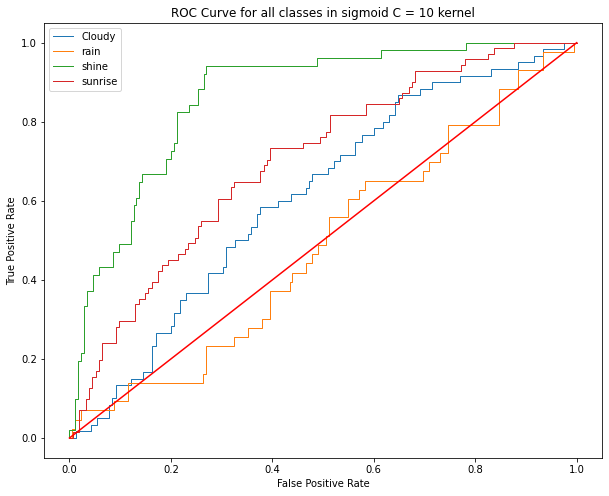

sigmoid C = 100 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.000000,0.000000,0.000000,5.000000
1.0,rain,0.234483,0.395349,0.166667,102.000000
2.0,shine,0.038961,0.058824,0.029126,103.000000
3.0,sunrise,0.209302,0.126761,0.600000,15.000000
accuracy,,0.128889,0.128889,0.128889,0.128889
macro avg,,0.120687,0.145233,0.198948,225.000000
weighted avg,,0.138088,0.214604,0.128889,225.000000


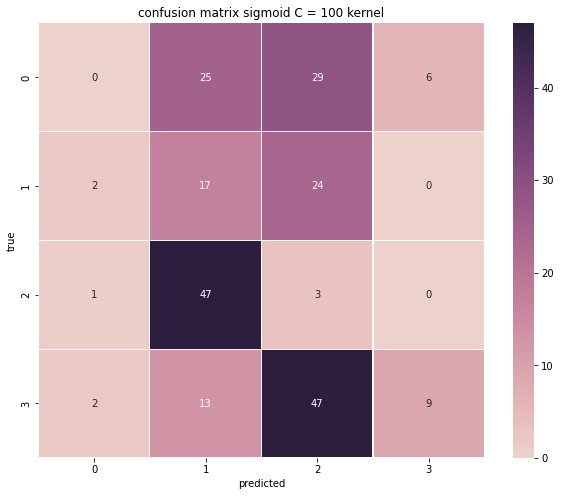

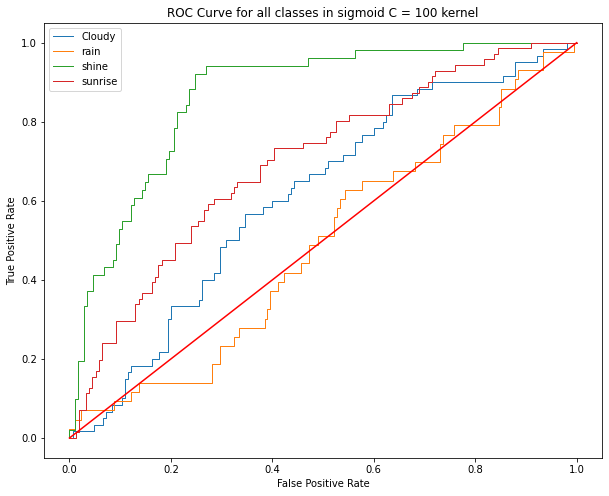

In [48]:

labels = ['sigmoid C = 0.1 kernel', 'sigmoid C = 1 sigmoid', 'sigmoid C = 10 kernel', 'sigmoid C = 100 kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(train_set, train_labels)
    print(lab)
    y_pred = clf.predict(test_set)
    y_proba = clf.predict_proba(test_set)
    display(generate_classification_report(test_labels, y_pred))
    confusion_plot(test_labels,y_pred,lab)
    plt.show()
    plot_roc_curve_all(test_labels,y_proba,4,lab)


# SVM with Poly 3 degree Kernel

In [49]:
clf1 = SVC(C = 0.1, kernel = "poly", degree = 3,gamma='scale',probability=True, decision_function_shape='ovr')
clf2 = SVC(C = 1, kernel = "poly", degree = 3,gamma='scale',probability=True, decision_function_shape='ovr')
clf3 = SVC(C = 10, kernel = "poly", degree = 3,gamma='scale',probability=True, decision_function_shape='ovr')
clf4 = SVC(C = 100, kernel = "poly", degree = 3,gamma='scale',probability=True, decision_function_shape='ovr')

poly3 C = 0.1 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.603448,0.583333,0.625000,56.00
1.0,rain,0.650602,0.627907,0.675000,40.00
2.0,shine,0.721649,0.686275,0.760870,46.00
3.0,sunrise,0.727273,0.788732,0.674699,83.00
accuracy,,0.680000,0.680000,0.680000,0.68
macro avg,,0.675743,0.671562,0.683892,225.00
weighted avg,,0.681674,0.688073,0.680000,225.00


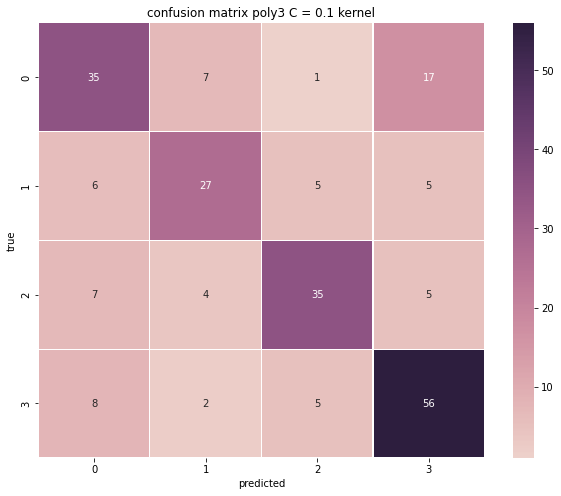

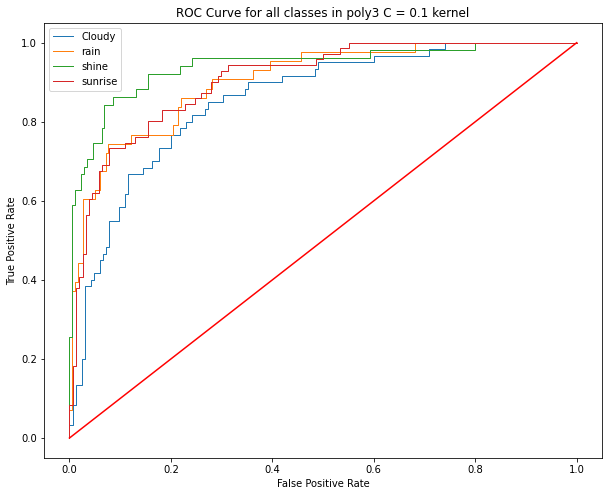

poly3 C = 1 Kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.603448,0.583333,0.625000,56.000000
1.0,rain,0.674699,0.651163,0.700000,40.000000
2.0,shine,0.780000,0.764706,0.795918,49.000000
3.0,sunrise,0.768212,0.816901,0.725000,80.000000
accuracy,,0.711111,0.711111,0.711111,0.711111
macro avg,,0.706590,0.704026,0.711480,225.000000
weighted avg,,0.713147,0.717937,0.711111,225.000000


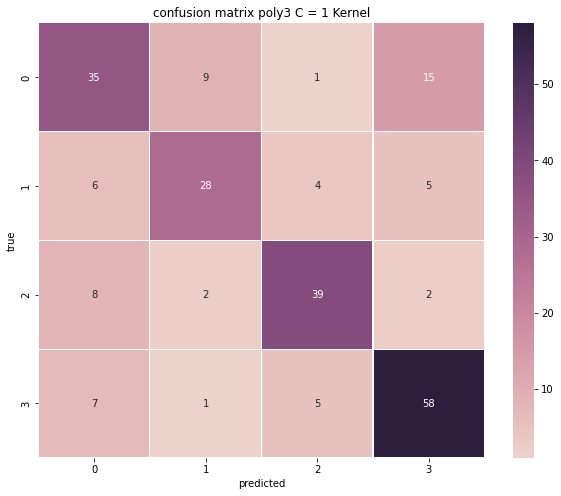

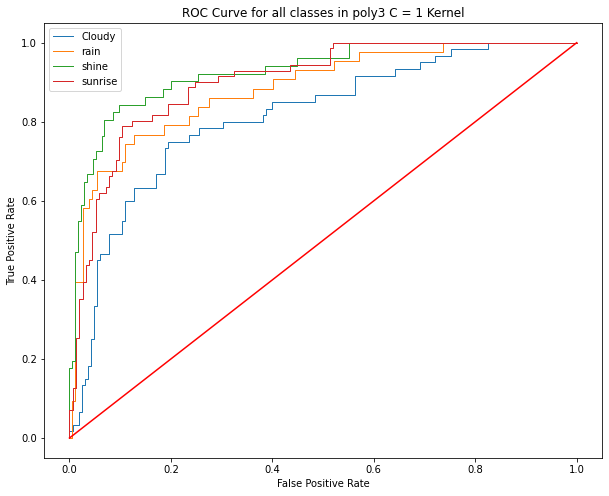

poly3 C = 10 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.601626,0.616667,0.587302,63.000000
1.0,rain,0.626506,0.604651,0.650000,40.000000
2.0,shine,0.757282,0.764706,0.750000,52.000000
3.0,sunrise,0.765957,0.760563,0.771429,70.000000
accuracy,,0.693333,0.693333,0.693333,0.693333
macro avg,,0.687843,0.686647,0.689683,225.000000
weighted avg,,0.693148,0.693512,0.693333,225.000000


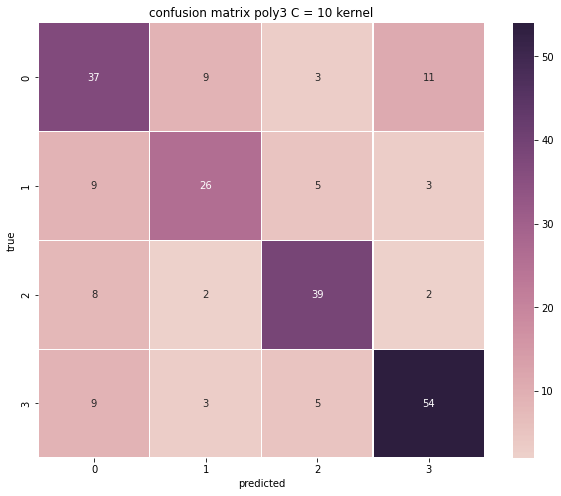

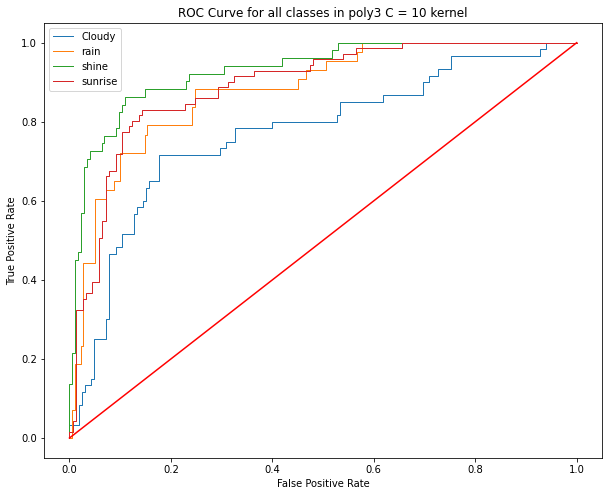

poly3 C = 100 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.581197,0.566667,0.596491,57.000000
1.0,rain,0.629213,0.651163,0.608696,46.000000
2.0,shine,0.737864,0.745098,0.730769,52.000000
3.0,sunrise,0.737589,0.732394,0.742857,70.000000
accuracy,,0.675556,0.675556,0.675556,0.675556
macro avg,,0.671466,0.673830,0.669703,225.000000
weighted avg,,0.675876,0.676739,0.675556,225.000000


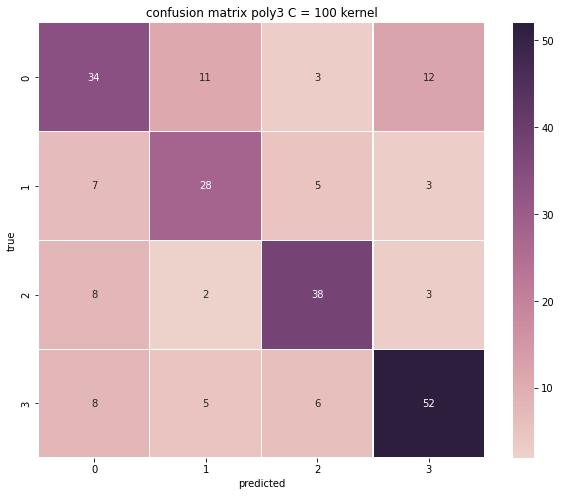

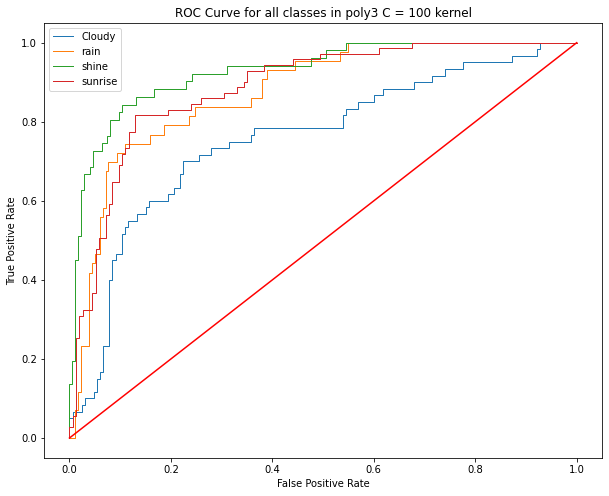

In [50]:

labels = ['poly3 C = 0.1 kernel', 'poly3 C = 1 Kernel', 'poly3 C = 10 kernel', 'poly3 C = 100 kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(train_set, train_labels)
    print(lab)
    y_pred = clf.predict(test_set)
    y_proba = clf.predict_proba(test_set)
    display(generate_classification_report(test_labels, y_pred))
    confusion_plot(test_labels,y_pred,lab)
    plt.show()
    plot_roc_curve_all(test_labels,y_proba,4,lab)


# SVM with Poly 5 degree Kernel

In [51]:
clf1 = SVC(C = 0.1, kernel = "poly", degree = 5,gamma='scale',probability=True, decision_function_shape='ovr')
clf2 = SVC(C = 1, kernel = "poly", degree = 5,gamma='scale',probability=True, decision_function_shape='ovr')
clf3 = SVC(C = 10, kernel = "poly", degree = 5,gamma='scale',probability=True, decision_function_shape='ovr')
clf4 = SVC(C = 100, kernel = "poly", degree = 5,gamma='scale',probability=True, decision_function_shape='ovr')

poly5 C = 0.1 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.576271,0.566667,0.586207,58.000000
1.0,rain,0.682927,0.651163,0.717949,39.000000
2.0,shine,0.740000,0.725490,0.755102,49.000000
3.0,sunrise,0.733333,0.774648,0.696203,79.000000
accuracy,,0.684444,0.684444,0.684444,0.684444
macro avg,,0.683133,0.679492,0.688865,225.000000
weighted avg,,0.685561,0.688925,0.684444,225.000000


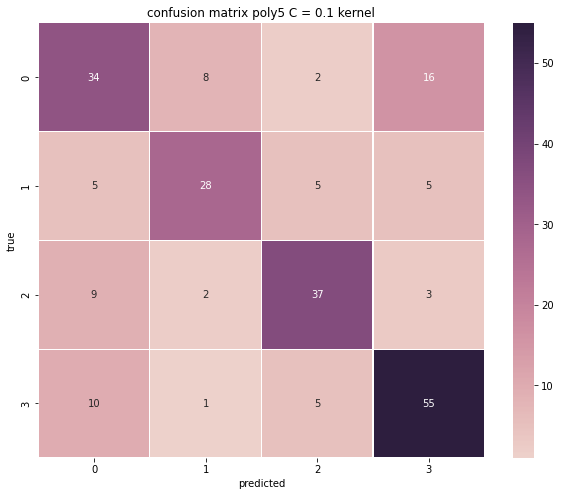

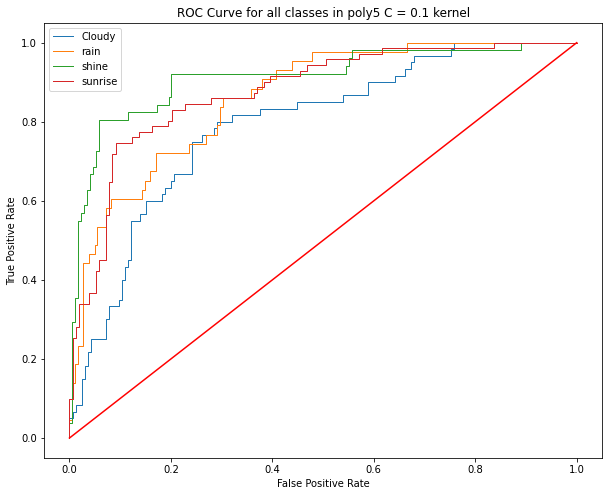

poly5 C = 1 Kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.628099,0.633333,0.622951,61.000000
1.0,rain,0.682927,0.651163,0.717949,39.000000
2.0,shine,0.718447,0.725490,0.711538,52.000000
3.0,sunrise,0.736111,0.746479,0.726027,73.000000
accuracy,,0.693333,0.693333,0.693333,0.693333
macro avg,,0.691396,0.689116,0.694616,225.000000
weighted avg,,0.693527,0.694432,0.693333,225.000000


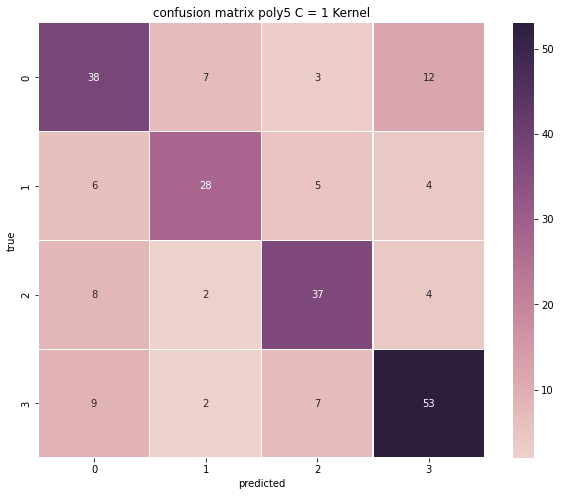

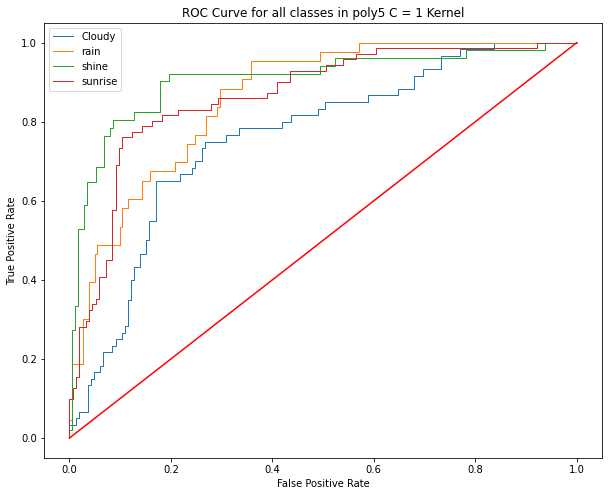

poly5 C = 10 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.592000,0.616667,0.569231,65.00
1.0,rain,0.651163,0.651163,0.651163,43.00
2.0,shine,0.705882,0.705882,0.705882,51.00
3.0,sunrise,0.759124,0.732394,0.787879,66.00
accuracy,,0.680000,0.680000,0.680000,0.68
macro avg,,0.677042,0.676527,0.678539,225.00
weighted avg,,0.678143,0.677428,0.680000,225.00


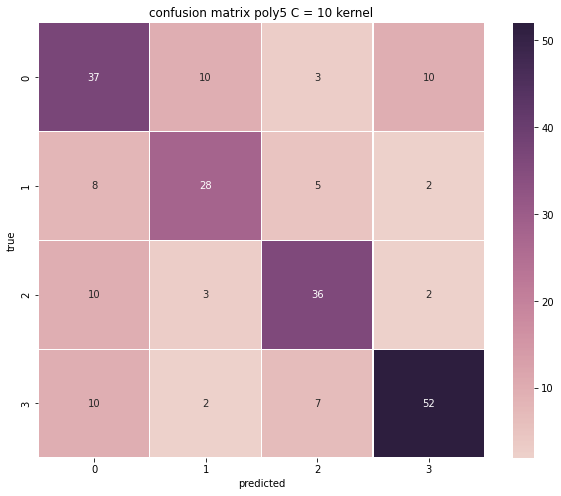

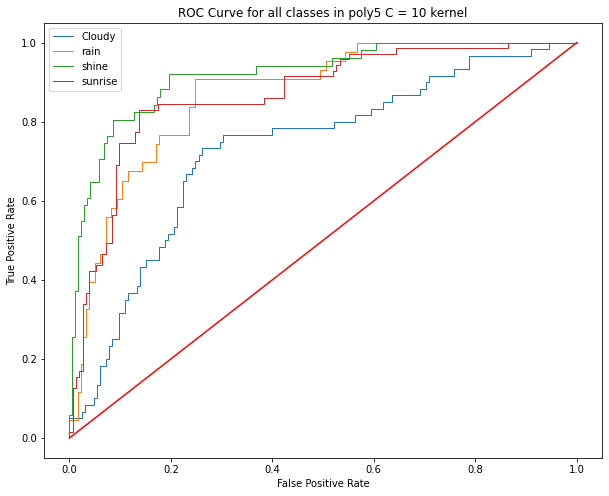

poly5 C = 100 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.539683,0.566667,0.515152,66.000000
1.0,rain,0.613636,0.627907,0.600000,45.000000
2.0,shine,0.705882,0.705882,0.705882,51.000000
3.0,sunrise,0.716418,0.676056,0.761905,63.000000
accuracy,,0.644444,0.644444,0.644444,0.644444
macro avg,,0.643905,0.644128,0.645735,225.000000
weighted avg,,0.641631,0.641099,0.644444,225.000000


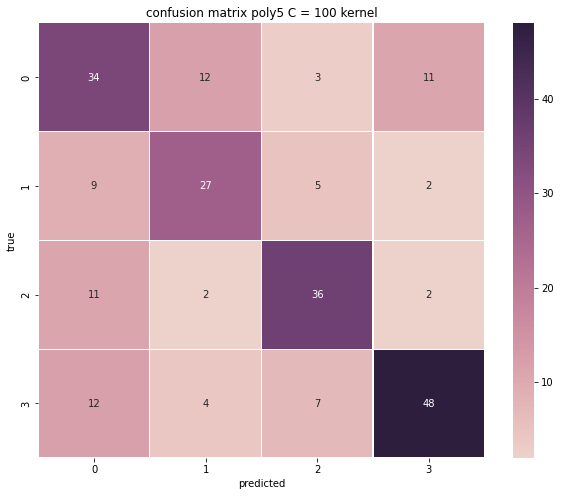

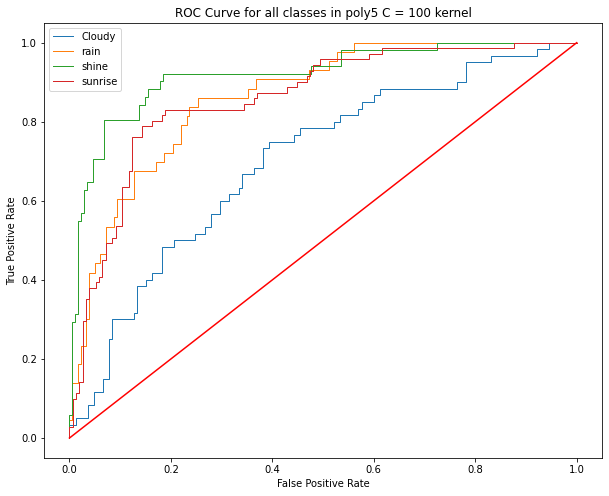

In [52]:

labels = ['poly5 C = 0.1 kernel', 'poly5 C = 1 Kernel', 'poly5 C = 10 kernel', 'poly5 C = 100 kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(train_set, train_labels)
    print(lab)
    y_pred = clf.predict(test_set)
    y_proba = clf.predict_proba(test_set)
    display(generate_classification_report(test_labels, y_pred))
    confusion_plot(test_labels,y_pred,lab)
    plt.show()
    plot_roc_curve_all(test_labels,y_proba,4,lab)


# PCA 

In [53]:
pca_pca = PCA(n_components=10)
pca_pca.fit(X_train)

X_train_pca = pca_pca.transform(X_train)
Y_train_pca = Y_train

# make Train & validation set
train_set_pca, test_set_pca, train_labels_pca, test_labels_pca = train_test_split(X_train_pca, Y_train_pca, stratify=Y_train_pca,
                                                                      random_state= 231,test_size=0.20)

In [57]:
d = {}
for i in range(2,10):
  d[i] = 0.5

In [58]:
d_r = {}
for i in range(2,10):
  d_r[i] = 1

In [59]:
clf1 = SVC(kernel = "linear",gamma='scale',probability=True)
clf2 = SVC(kernel = "rbf",gamma='scale',probability=True)
clf3 = SVC(kernel = "poly", degree=3,gamma='scale',probability=True)
clf4 = SVC(kernel = "sigmoid",gamma='scale',probability=True)

<ipython-input-60-24ebeab0dc19>:10: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  fig = plot_decision_regions(X=X_train_pca, y=Y_train_pca.astype(np.integer), clf=clf,hide_spines = False, legend=1, filler_feature_values=d, filler_feature_ranges=d_r)
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
<ipython-input-60-24ebeab0dc19>:10: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensu

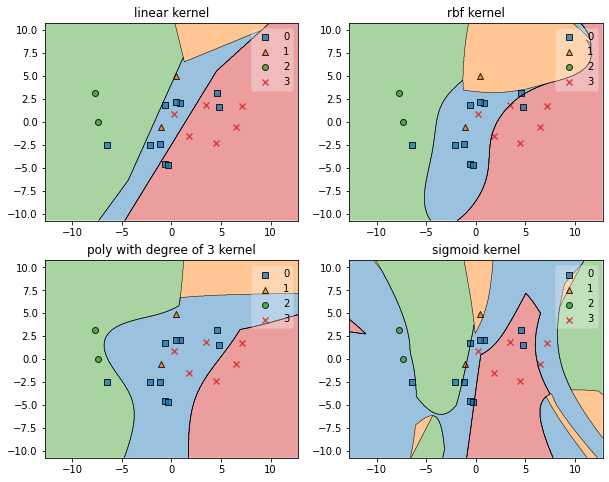

In [60]:
fig = plt.figure(figsize=(10,8))

labels = ['linear kernel', 'rbf kernel', 'poly with degree of 3 kernel', 'sigmoid kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train_pca, Y_train_pca)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_pca, y=Y_train_pca.astype(np.integer), clf=clf,hide_spines = False, legend=1, filler_feature_values=d, filler_feature_ranges=d_r)
    plt.title(lab)

plt.show()

linear kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.504348,0.483333,0.527273,55.000000
1.0,rain,0.641026,0.581395,0.714286,35.000000
2.0,shine,0.641509,0.666667,0.618182,55.000000
3.0,sunrise,0.728477,0.774648,0.687500,80.000000
accuracy,,0.635556,0.635556,0.635556,0.635556
macro avg,,0.628840,0.626511,0.636810,225.000000
weighted avg,,0.638828,0.646981,0.635556,225.000000


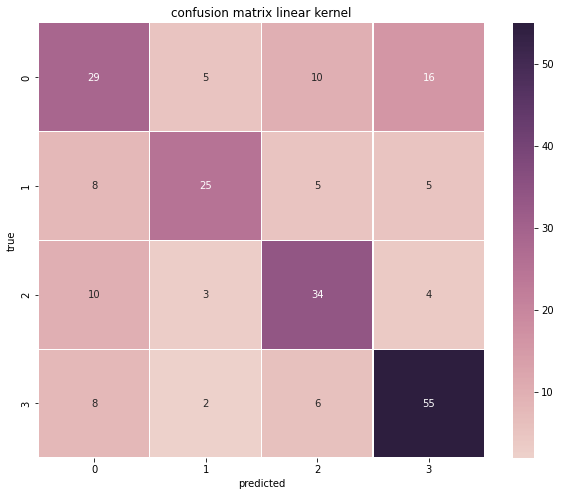

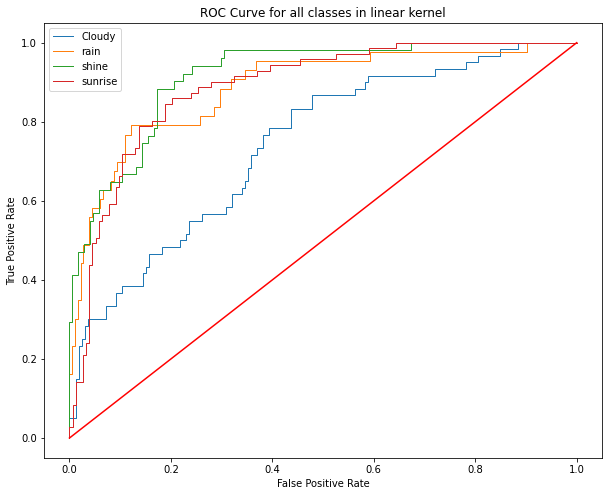

rbf kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.660550,0.600000,0.734694,49.000000
1.0,rain,0.722892,0.697674,0.750000,40.000000
2.0,shine,0.770642,0.823529,0.724138,58.000000
3.0,sunrise,0.778523,0.816901,0.743590,78.000000
accuracy,,0.737778,0.737778,0.737778,0.737778
macro avg,,0.733152,0.734526,0.738105,225.000000
weighted avg,,0.740910,0.750178,0.737778,225.000000


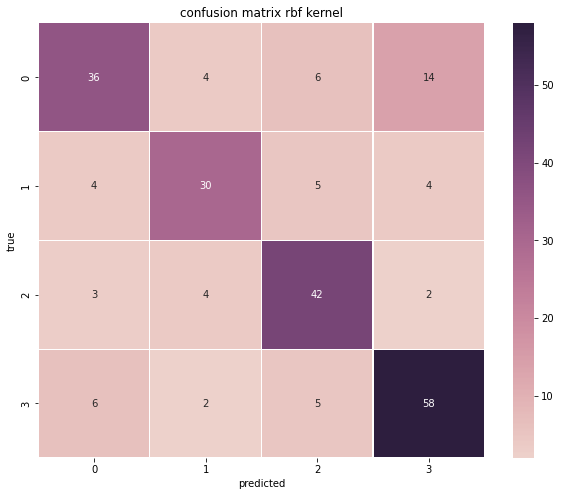

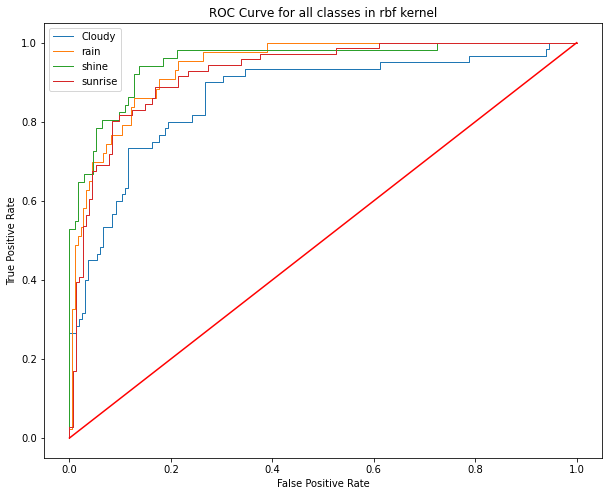

poly with degree of 3 kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.657895,0.833333,0.543478,92.000000
1.0,rain,0.637681,0.511628,0.846154,26.000000
2.0,shine,0.752688,0.686275,0.833333,42.000000
3.0,sunrise,0.750000,0.718310,0.784615,65.000000
accuracy,,0.702222,0.702222,0.702222,0.702222
macro avg,,0.699566,0.687386,0.751895,225.000000
weighted avg,,0.699862,0.735479,0.702222,225.000000


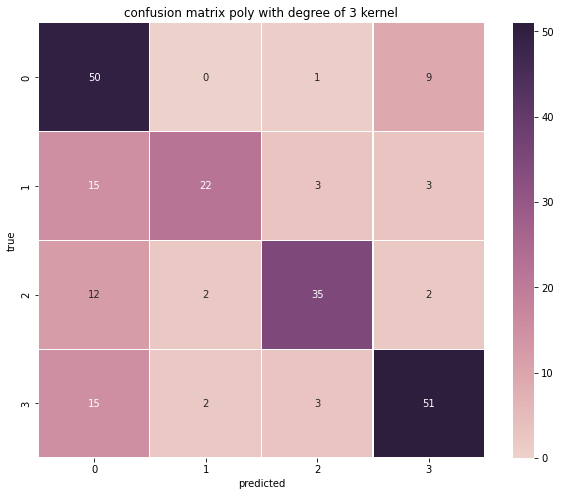

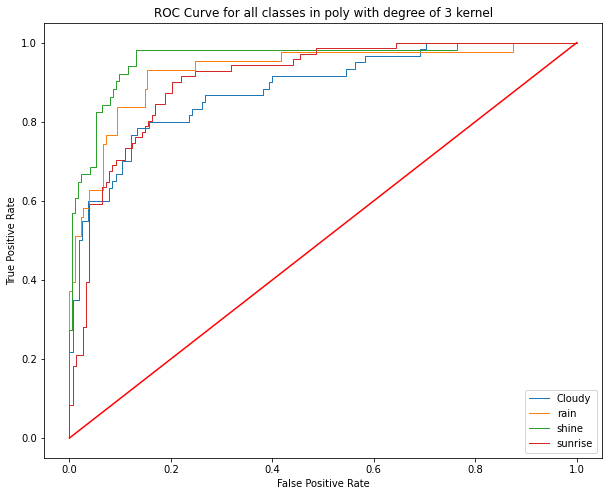

sigmoid kernel


,Label,f1-score,precision,recall,support
0.0,Cloudy,0.364964,0.416667,0.324675,77.000000
1.0,rain,0.388060,0.302326,0.541667,24.000000
2.0,shine,0.516129,0.627451,0.438356,73.000000
3.0,sunrise,0.590164,0.507042,0.705882,51.000000
accuracy,,0.471111,0.471111,0.471111,0.471111
macro avg,,0.464829,0.463371,0.502645,225.000000
weighted avg,,0.467517,0.493343,0.471111,225.000000


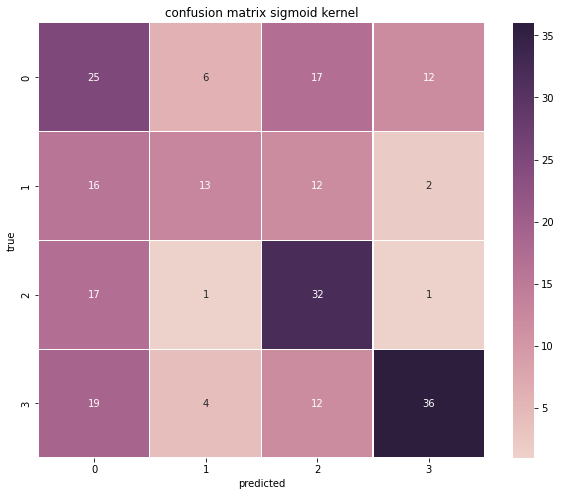

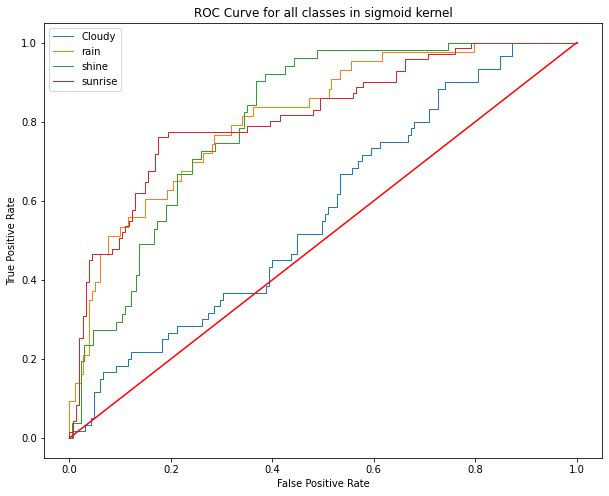

In [61]:

labels = ['linear kernel', 'rbf kernel', 'poly with degree of 3 kernel', 'sigmoid kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):
    print(lab)
    y_pred = clf.predict(test_set_pca)
    y_proba = clf.predict_proba(test_set_pca)
    display(generate_classification_report(test_labels, y_pred))
    confusion_plot(test_labels,y_pred,lab)
    plt.show()
    plot_roc_curve_all(test_labels,y_proba,4,lab)